In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
file = "Delhi_Weather.csv"
dt_parse = (lambda x: pd.datetime.strptime(x, "%Y%m%d-%H:%M"))

delhi_df = pd.read_csv(file, usecols=["datetime_utc", " _tempm", " _hum", " _conds"], 
                       parse_dates=["datetime_utc"],date_parser=dt_parse)

delhi_df.rename(columns={" _tempm": "temp", " _hum": "humidity", " _conds": "conditions"}, inplace=True)
# delhi_df.reset_index("datetime_utc")

<ipython-input-2-717677ac8d56>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dt_parse = (lambda x: pd.datetime.strptime(x, "%Y%m%d-%H:%M"))


In [3]:
# delhi_df.reset_index("datetime_utc")
delhi_df.head(5)

,datetime_utc,conditions,humidity,temp
0,1996-11-01 11:00:00,Smoke,27.0,30.0
1,1996-11-01 12:00:00,Smoke,32.0,28.0
2,1996-11-01 13:00:00,Smoke,44.0,24.0
3,1996-11-01 14:00:00,Smoke,41.0,24.0
4,1996-11-01 16:00:00,Smoke,47.0,23.0


In [4]:
# checking if datetime_utc columnhave any duplicate value
delhi_df["datetime_utc"].duplicated().sum()

0

In [5]:
# number on NAN values in Temp column
delhi_df["temp"].isna().sum()

673

In [6]:
# number on NAN values in Humidity column
delhi_df["humidity"].isna().sum()

757

In [7]:
# number on NAN values in Temp, Humidity column
delhi_df.loc[:, "humidity":"temp"].isna().sum()

humidity    757
temp        673
dtype: int64

In [8]:
# deleting rows with NAN values
delhi_df.dropna(axis=0, how="any", inplace=True)

In [9]:
# Total NAN values in DF
delhi_df.isna().sum()

datetime_utc    0
conditions      0
humidity        0
temp            0
dtype: int64

In [10]:
delhi_df.datetime_utc.max()

Timestamp('2017-04-24 18:00:00')

## Temprature Graph

In [11]:
daily_df = delhi_df.set_index("datetime_utc")
daily_df.head()

,conditions,humidity,temp
datetime_utc,,,
1996-11-01 11:00:00,Smoke,27.0,30.0
1996-11-01 12:00:00,Smoke,32.0,28.0
1996-11-01 13:00:00,Smoke,44.0,24.0
1996-11-01 14:00:00,Smoke,41.0,24.0
1996-11-01 16:00:00,Smoke,47.0,23.0


In [12]:
daily_df = daily_df.resample("D").agg({"temp": "mean", "humidity": "mean"})
daily_df.head()

,temp,humidity
datetime_utc,,
1996-11-01,22.333333,52.916667
1996-11-02,22.916667,48.625000
1996-11-03,21.791667,55.958333
1996-11-04,22.722222,48.055556
1996-11-05,27.800000,29.400000


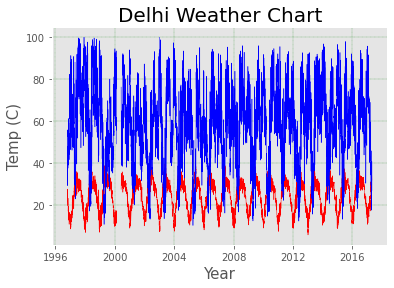

In [13]:
style.use("ggplot")
plt.plot(daily_df["temp"], "r", label="Temp", linewidth=0.5)
plt.plot(daily_df["humidity"], "b", label="Humidity", linewidth=0.5)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Temp (C)", fontsize=15)
plt.title("Delhi Weather Chart", fontsize=20)
# plt.legend("Temp", "Humidity")
plt.grid(color="g", linewidth=0.25, linestyle="--")
# plt.axis([1995, 2005, 0, 50])
plt.show()

## Temprature for Every Mar every Year

In [14]:
march_filt = (delhi_df["datetime_utc"].dt.month==3)
march_df = delhi_df.loc[march_filt]
march_df.head()

,datetime_utc,conditions,humidity,temp
2491,1997-03-01 02:00:00,Smoke,68.0,17.0
2492,1997-03-01 05:00:00,Smoke,26.0,28.0
2493,1997-03-01 06:00:00,Haze,29.0,29.0
2494,1997-03-01 09:00:00,Haze,22.0,32.0
2495,1997-03-01 10:00:00,Haze,22.0,32.0


In [15]:
march_df.set_index("datetime_utc", inplace=True)
march_df.head()

,conditions,humidity,temp
datetime_utc,,,
1997-03-01 02:00:00,Smoke,68.0,17.0
1997-03-01 05:00:00,Smoke,26.0,28.0
1997-03-01 06:00:00,Haze,29.0,29.0
1997-03-01 09:00:00,Haze,22.0,32.0
1997-03-01 10:00:00,Haze,22.0,32.0


In [16]:
march_df = march_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
march_df

,temp,humidity
datetime_utc,,
1997-03-31,21.137037,61.887037
1997-04-30,NaN,NaN
1997-05-31,NaN,NaN
1997-06-30,NaN,NaN
1997-07-31,NaN,NaN
...,...,...
2016-11-30,NaN,NaN
2016-12-31,NaN,NaN
2017-01-31,NaN,NaN


In [17]:
march_df.dropna(inplace=True)
march_df.head()

,temp,humidity
datetime_utc,,
1997-03-31,21.137037,61.887037
1998-03-31,19.795053,67.367491
1999-03-31,22.431973,44.125850
2001-03-31,23.505279,39.099548
2002-03-31,24.518569,42.419532


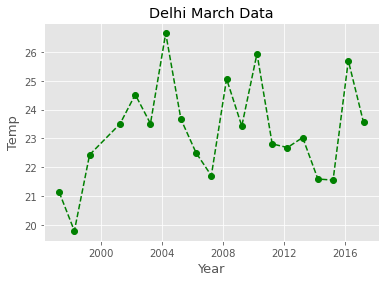

In [18]:
plt.plot(march_df["temp"], 'go--', )
plt.title("Delhi March Data")
plt.xlabel("Year", fontsize=13)
plt.ylabel("Temp", fontsize=13)
plt.show()

In [19]:
march_df = march_df.reset_index()
march_df["Year"] = march_df["datetime_utc"].dt.year
march_df.set_index("Year", inplace=True)
march_df.head()

,datetime_utc,temp,humidity
Year,,,
1997,1997-03-31,21.137037,61.887037
1998,1998-03-31,19.795053,67.367491
1999,1999-03-31,22.431973,44.125850
2001,2001-03-31,23.505279,39.099548
2002,2002-03-31,24.518569,42.419532


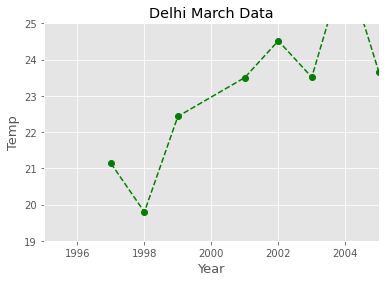

In [20]:
plt.plot(march_df["temp"], 'go--', )
plt.title("Delhi March Data")
plt.xlabel("Year", fontsize=13)
plt.ylabel("Temp", fontsize=13)
plt.axis([1995, 2005, 19, 25])
plt.show()

## all 12 months

In [21]:
monthly_df = delhi_df.copy()

In [22]:
# FILTERS
jan_filt = (monthly_df["datetime_utc"].dt.month == 1)
feb_filt = (monthly_df["datetime_utc"].dt.month == 2)
mar_filt = (monthly_df["datetime_utc"].dt.month == 3)
apr_filt = (monthly_df["datetime_utc"].dt.month == 4)
may_filt = (monthly_df["datetime_utc"].dt.month == 5)
jun_filt = (monthly_df["datetime_utc"].dt.month == 6)
jul_filt = (monthly_df["datetime_utc"].dt.month == 7)
aug_filt = (monthly_df["datetime_utc"].dt.month == 8)
sep_filt = (monthly_df["datetime_utc"].dt.month == 9)
oct_filt = (monthly_df["datetime_utc"].dt.month == 10)
nov_filt = (monthly_df["datetime_utc"].dt.month == 11)
dec_filt = (monthly_df["datetime_utc"].dt.month == 12)

In [23]:
# JAN YEAR WISE DATA
jan_df = monthly_df.loc[jan_filt].copy()
jan_df.set_index("datetime_utc", inplace=True)
jan_df = jan_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
jan_df.dropna(inplace=True)
jan_df.reset_index(inplace=True)
jan_df['year'] = jan_df["datetime_utc"].dt.year
jan_df.set_index("year", inplace=True)
jan_df.head()

,datetime_utc,temp,humidity
year,,,
1997,1997-01-31,12.871118,75.490683
1998,1998-01-31,12.907336,76.239382
1999,1999-01-31,12.174797,80.829268
2000,2000-01-31,13.730321,76.842566
2001,2001-01-31,12.568436,76.696927


In [24]:
# FEB YEAR WISE DATA
feb_df = monthly_df.loc[feb_filt].copy()
feb_df.set_index("datetime_utc", inplace=True)
feb_df = feb_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
feb_df.dropna(inplace=True)
feb_df.reset_index(inplace=True)
feb_df['year'] = feb_df["datetime_utc"].dt.year
feb_df.set_index("year", inplace=True)
feb_df.head()

,datetime_utc,temp,humidity
year,,,
1997,1997-02-28,15.778777,62.431655
1998,1998-02-28,16.346457,73.866142
1999,1999-02-28,16.595819,69.825784
2000,2000-02-29,14.991361,74.609071
2001,2001-02-28,18.241270,51.880952


In [25]:
# MARCH YEAR WISE DATA
mar_df = monthly_df.loc[mar_filt].copy()
mar_df.set_index("datetime_utc", inplace=True)
mar_df = mar_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
mar_df.dropna(inplace=True)

mar_df.reset_index(inplace=True)
mar_df['year'] = mar_df["datetime_utc"].dt.year
mar_df.set_index("year", inplace=True)

mar_df.head()

,datetime_utc,temp,humidity
year,,,
1997,1997-03-31,21.137037,61.887037
1998,1998-03-31,19.795053,67.367491
1999,1999-03-31,22.431973,44.125850
2001,2001-03-31,23.505279,39.099548
2002,2002-03-31,24.518569,42.419532


In [26]:
# APRIL YEAR WISE DATA
apr_df = monthly_df.loc[apr_filt].copy()
apr_df.set_index("datetime_utc", inplace=True)
apr_df = apr_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
apr_df.dropna(inplace=True)

apr_df.reset_index(inplace=True)
apr_df['year'] = apr_df["datetime_utc"].dt.year
apr_df.set_index("year", inplace=True)

apr_df.head()

,datetime_utc,temp,humidity
year,,,
1997,1997-04-30,26.306931,50.528053
1998,1998-04-30,28.698630,47.441781
1999,1999-04-30,31.465909,21.420455
2000,2000-04-30,35.000000,32.000000
2001,2001-04-30,29.781388,42.974889


In [27]:
# MAY YEAR WISE DATA
may_df = monthly_df.loc[may_filt].copy()
may_df.set_index("datetime_utc", inplace=True)
may_df = may_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
may_df.dropna(inplace=True)

may_df.reset_index(inplace=True)
may_df['year'] = may_df["datetime_utc"].dt.year
may_df.set_index("year", inplace=True)

may_df.head()

,datetime_utc,temp,humidity
year,,,
1997,1997-05-31,29.949821,45.100358
1998,1998-05-31,34.026820,34.766284
1999,1999-05-31,34.291465,32.652174
2000,2000-05-31,26.000000,61.000000
2001,2001-05-31,33.019526,39.889819


In [28]:
# JUNE YEAR WISE DATA
jun_df = monthly_df.loc[jun_filt].copy()
jun_df.set_index("datetime_utc", inplace=True)
jun_df = jun_df.resample("M").agg({"temp":"mean", "humidity": "mean"})

jun_df.reset_index(inplace=True)
jun_df['year'] = jun_df["datetime_utc"].dt.year
jun_df.set_index("year", inplace=True)
jun_df.dropna(inplace=True)

jun_df.head()

,datetime_utc,temp,humidity
year,,,
1997,1997-06-30,31.806202,64.496124
1998,1998-06-30,32.450593,63.003953
1999,1999-06-30,34.312874,41.200599
2000,2000-06-30,32.481069,50.002227
2001,2001-06-30,31.029197,59.478832


In [29]:
# JULY YEAR WISE DATA
jul_df = monthly_df.loc[jul_filt].copy()
jul_df.set_index("datetime_utc", inplace=True)
jul_df = jul_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
jul_df.dropna(inplace=True)

jul_df.reset_index(inplace=True)
jul_df['year'] = jul_df["datetime_utc"].dt.year
jul_df.set_index("year", inplace=True)

jul_df.head()

,datetime_utc,temp,humidity
year,,,
1997,1997-07-31,31.147920,81.983051
1998,1998-07-31,29.980501,88.181058
1999,1999-07-31,32.011412,51.065621
2000,2000-07-31,30.262937,63.037762
2001,2001-07-31,30.973164,69.659605


In [30]:
# AUGUST YEAR WISE DATA
aug_df = monthly_df.loc[aug_filt].copy()
aug_df.set_index("datetime_utc", inplace=True)
aug_df = aug_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
aug_df.dropna(inplace=True)

aug_df.reset_index(inplace=True)
aug_df['year'] = aug_df["datetime_utc"].dt.year
aug_df.set_index("year", inplace=True)

aug_df.head()

,datetime_utc,temp,humidity
year,,,
1997,1997-08-31,29.536082,83.041237
1998,1998-08-31,29.250681,86.899183
1999,1999-08-31,32.935252,40.965468
2000,2000-08-31,31.912214,65.370229
2001,2001-08-31,31.128134,63.412256


In [31]:
# SEPTEMBER YEAR WISE DATA
sep_df = monthly_df.loc[sep_filt].copy()
sep_df.set_index("datetime_utc", inplace=True)
sep_df = sep_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
sep_df.dropna(inplace=True)
sep_df.head()
sep_df.reset_index(inplace=True)
sep_df['year'] = sep_df["datetime_utc"].dt.year
sep_df.set_index("year", inplace=True)
sep_df.head()

,datetime_utc,temp,humidity
year,,,
1997,1997-09-30,29.773554,71.000000
1998,1998-09-30,29.142857,77.906593
1999,1999-09-30,30.790520,61.781346
2000,2000-09-30,30.153846,66.975867
2001,2001-09-30,31.190202,51.226225


In [32]:
# OCTOBER YEAR WISE DATA
oct_df = monthly_df.loc[oct_filt].copy()
oct_df.set_index("datetime_utc", inplace=True)
oct_df = oct_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
oct_df.dropna(inplace=True)

oct_df.reset_index(inplace=True)
oct_df['year'] = oct_df["datetime_utc"].dt.year
oct_df.set_index("year", inplace=True)

oct_df.head()

,datetime_utc,temp,humidity
year,,,
1997,1997-10-31,24.126582,72.340190
1998,1998-10-31,25.282313,71.918367
1999,1999-10-31,27.702749,52.584192
2000,2000-10-31,28.218487,54.711485
2001,2001-10-31,27.841176,50.770588


In [33]:
# NOVEMBER YEAR WISE DATA
nov_df = monthly_df.loc[nov_filt].copy()
nov_df.set_index("datetime_utc", inplace=True)
nov_df = nov_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
nov_df.dropna(inplace=True)

nov_df.reset_index(inplace=True)
nov_df['year'] = nov_df["datetime_utc"].dt.year
nov_df.set_index("year", inplace=True)

nov_df.head()

,datetime_utc,temp,humidity
year,,,
1996,1996-11-30,19.438944,48.252475
1997,1997-11-30,19.841328,68.291513
1998,1998-11-30,20.263492,62.860317
1999,1999-11-30,22.649485,41.814433
2000,2000-11-30,22.104651,56.680233


In [34]:
# DECEMBER YEAR WISE DATA
dec_df = monthly_df.loc[dec_filt].copy()
dec_df.set_index("datetime_utc", inplace=True)
dec_df = dec_df.resample("M").agg({"temp":"mean", "humidity": "mean"})
dec_df.dropna(inplace=True)

dec_df.reset_index(inplace=True)
dec_df['year'] = dec_df["datetime_utc"].dt.year
dec_df.set_index("year", inplace=True)

dec_df.head()

,datetime_utc,temp,humidity
year,,,
1996,1996-12-31,13.828484,58.710567
1997,1997-12-31,13.261993,88.966790
1998,1998-12-31,14.330472,74.218884
1999,1999-12-31,15.161538,67.000000
2000,2000-12-31,16.100418,57.185495


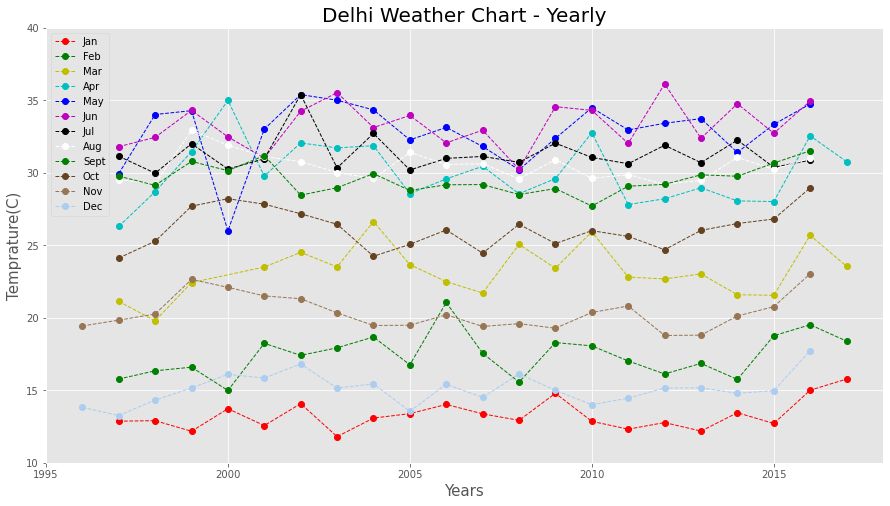

In [38]:
plt.figure(figsize=(15, 8))
plt.plot(jan_df["temp"], "ro--", linewidth=1, label="Jan")
plt.plot(feb_df["temp"], "go--", linewidth=1, label="Feb")
plt.plot(mar_df["temp"], "yo--", linewidth=1, label="Mar")
plt.plot(apr_df["temp"], "co--", linewidth=1, label="Apr")
plt.plot(may_df["temp"], "bo--", linewidth=1, label="May")
plt.plot(jun_df["temp"], "mo--", linewidth=1, label="Jun")
plt.plot(jul_df["temp"], "ko--", linewidth=1, label="Jul")
plt.plot(aug_df["temp"], "wo--", linewidth=1, label="Aug")
plt.plot(sep_df["temp"], "go--", linewidth=1, label="Sept")
plt.plot(oct_df["temp"], color="#654321", marker="o", linestyle="--", linewidth=1, label="Oct")
plt.plot(nov_df["temp"], color="#987654", marker="o", linestyle="--", linewidth=1, label="Nov")
plt.plot(dec_df["temp"], color="#ABCDEF", marker="o", linestyle="--", linewidth=1, label="Dec")
plt.legend(loc=2)
plt.title("Delhi Weather Chart - Yearly", fontsize=20)
plt.ylabel("Temprature(C)", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.axis([1995, 2018, 10, 40])
plt.show()